In [1]:
import numpy as np 
import matplotlib.pyplot as plt

#### 1: Generate sample data

In [3]:
# Generate sample data
np.random.seed(0) # For reproducibility
X = 2* np.random.rand(100,1) # 100 samples, 1 feature
y = 4 + 3* np.random.rand(100,1) # linear relation with some noise

In [12]:
print(X[0:5],"\n")
print(y[0:5])

[[1.09762701]
 [1.43037873]
 [1.20552675]
 [1.08976637]
 [0.8473096 ]] 

[[6.03344961]
 [4.81002392]
 [6.20558207]
 [6.88656564]
 [4.74625943]]


#### 2: Add Bias Term
To include the intercept term (𝜃0), we'll add a column of ones to the input features.

In [13]:
X_b = np.c_[np.ones((100, 1)), X]  # Add bias term (column of ones)
print(X_b[0:5])

[[1.         1.09762701]
 [1.         1.43037873]
 [1.         1.20552675]
 [1.         1.08976637]
 [1.         0.8473096 ]]


#### 3: Initialize Parameters
Initialize the parameters (𝜃) to zero or small random values.

In [15]:
theta = np.random.randn(2, 1)  # Initialize theta randomly, 2 parameters (theta_0 and theta_1)
print(theta)

[[-1.14746865]
 [-0.43782004]]


#### 5: Define the Hypothesis Function
The hypothesis function ℎ(𝑥) for linear regression.

In [16]:
def predict(X, theta):
    return X.dot(theta)  # Matrix multiplication

#### 6: Compute the cost function

In [17]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = predict(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

#### 7: Gradient Descent Algorithm
Implement the gradient descent algorithm.

In [19]:
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = np.zeros(num_iterations)

    for i in range(num_iterations):
        predictions = predict(X, theta)
        errors = predictions - y
        gradients = (1 / m) * X.T.dot(errors)
        theta = theta - learning_rate * gradients
        cost_history[i] = compute_cost(X, y, theta)
    
    return theta, cost_history


#### 8: Run Gradient Descent
Set hyperparameters (learning rate and number of iterations) and run the gradient descent algorithm.

In [20]:
learning_rate = 0.1
num_iterations = 1000
theta_final, cost_history = gradient_descent(X_b, y, theta, learning_rate, num_iterations)

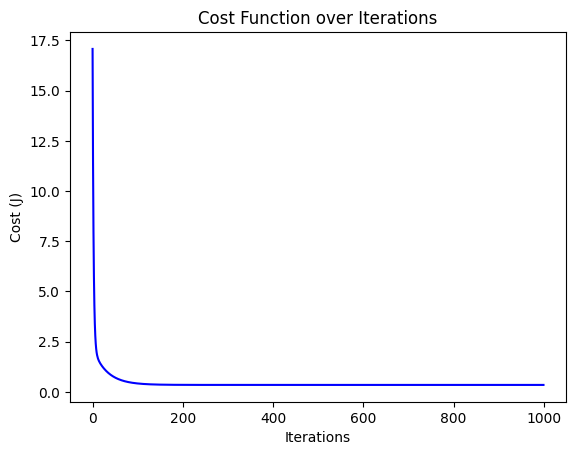

In [21]:
plt.plot(range(num_iterations), cost_history, 'b-')
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.title('Cost Function over Iterations')
plt.show()

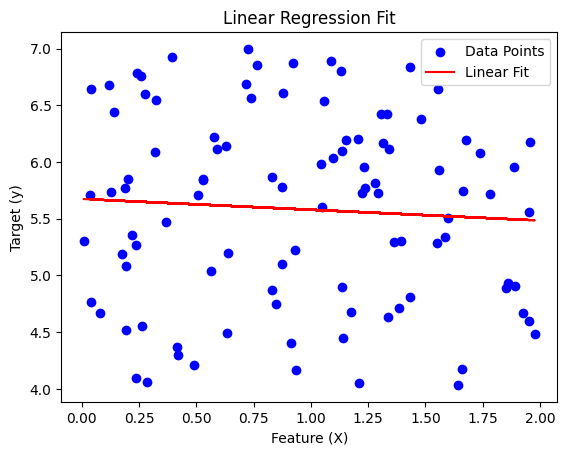

In [22]:
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, predict(X_b, theta_final), color='red', label='Linear Fit')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()
